In [2]:
#!!pip install scikit-hts
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [3]:
import os
os.getcwd()

'/Users/eugenechua/code/chua0332/Hierarchical_Forecasting_Lewagon/notebooks'

In [4]:
calendar_df = pd.read_csv('raw_data/m5-forecasting-accuracy/calendar.csv', parse_dates=['date'])
calendar_df.head()


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
sales_df = pd.read_csv('raw_data/m5-forecasting-accuracy/sales_train_evaluation.csv')
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [6]:
train_reduced = pd.read_csv('raw_data/m5-forecasting-accuracy/train_reduced.csv')
train_reduced.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
1,HOBBIES_1_058_CA_1_validation,HOBBIES_1_058,HOBBIES_1,HOBBIES,CA_1,CA,1,2,3,0,...,1,0,0,0,0,0,0,0,3,1
2,HOBBIES_1_062_CA_1_validation,HOBBIES_1_062,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,HOBBIES_1_082_CA_1_validation,HOBBIES_1_082,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,HOBBIES_1_104_CA_1_validation,HOBBIES_1_104,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2


In [7]:
reduced_train = pd.melt(train_reduced,id_vars=train_reduced.columns[0:6],value_vars=train_reduced.columns[6:1920],var_name='days',value_name='value')
reduced_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,days,value
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [8]:
reduced_train= reduced_train.merge(calendar_df, how='left', left_on='days', right_on='d')
reduced_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,days,value,date,wm_yr_wk,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [9]:
reduced_train.drop(['snap_CA'],  axis=1, inplace = True)

In [10]:
reduced_train.drop(['snap_TX'],  axis=1, inplace = True)

In [11]:
reduced_train.drop(['snap_WI'],  axis=1, inplace = True)

In [12]:
reduced_train.event_name_1.replace(np.nan, 'NoEvent', inplace=True)

In [13]:
reduced_train.event_name_2.replace(np.nan, 'NoEvent', inplace=True)

In [14]:
reduced_train.event_type_1.replace(np.nan, 'NoEvent', inplace=True)

In [15]:
reduced_train.event_type_2.replace(np.nan, 'NoEvent', inplace=True)

In [16]:
reduced_train.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'days',
       'value', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'],
      dtype='object')

In [17]:
exogenous_df = reduced_train[[
       "event_name_1_Chanukah End", "event_name_1_Christmas",
       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
       'event_name_1_EidAlAdha', "event_name_1_Father's day",
       'event_name_1_Halloween', 'event_name_1_IndependenceDay',
       'event_name_1_LaborDay', 'event_name_1_LentStart',
       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',
       'event_name_1_MemorialDay', "event_name_1_Mother's day",
       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
       'event_name_1_NewYear', 'event_name_1_NoEvent',
       'event_name_1_OrthodoxChristmas', 'event_name_1_OrthodoxEaster',
       'event_name_1_Pesach End', 'event_name_1_PresidentsDay',
       'event_name_1_Purim End', 'event_name_1_Ramadan starts',
       'event_name_1_StPatricksDay', 'event_name_1_SuperBowl',
       'event_name_1_Thanksgiving', 'event_name_1_ValentinesDay',
       'event_name_1_VeteransDay', 'event_name_2_Cinco De Mayo',
       'event_name_2_Easter', "event_name_2_Father's day",
       'event_name_2_NoEvent', 'event_name_2_OrthodoxEaster']]

exogenous_df.head(1)

KeyError: "None of [Index(['event_name_1_Chanukah End', 'event_name_1_Christmas',\n       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',\n       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',\n       'event_name_1_EidAlAdha', 'event_name_1_Father's day',\n       'event_name_1_Halloween', 'event_name_1_IndependenceDay',\n       'event_name_1_LaborDay', 'event_name_1_LentStart',\n       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',\n       'event_name_1_MemorialDay', 'event_name_1_Mother's day',\n       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',\n       'event_name_1_NewYear', 'event_name_1_NoEvent',\n       'event_name_1_OrthodoxChristmas', 'event_name_1_OrthodoxEaster',\n       'event_name_1_Pesach End', 'event_name_1_PresidentsDay',\n       'event_name_1_Purim End', 'event_name_1_Ramadan starts',\n       'event_name_1_StPatricksDay', 'event_name_1_SuperBowl',\n       'event_name_1_Thanksgiving', 'event_name_1_ValentinesDay',\n       'event_name_1_VeteransDay', 'event_name_2_Cinco De Mayo',\n       'event_name_2_Easter', 'event_name_2_Father's day',\n       'event_name_2_NoEvent', 'event_name_2_OrthodoxEaster'],\n      dtype='object')] are in the [columns]"

In [ ]:
reduced_train.drop(columns = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'event_name_1_Chanukah End', 'event_name_1_Christmas',
       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
       'event_name_1_EidAlAdha', "event_name_1_Father's day",
       'event_name_1_Halloween', 'event_name_1_IndependenceDay',
       'event_name_1_LaborDay', 'event_name_1_LentStart',
       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',
       'event_name_1_MemorialDay', "event_name_1_Mother's day",
       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
       'event_name_1_NewYear', 'event_name_1_NoEvent',
       'event_name_1_OrthodoxChristmas', 'event_name_1_OrthodoxEaster',
       'event_name_1_Pesach End', 'event_name_1_PresidentsDay',
       'event_name_1_Purim End', 'event_name_1_Ramadan starts',
       'event_name_1_StPatricksDay', 'event_name_1_SuperBowl',
       'event_name_1_Thanksgiving', 'event_name_1_ValentinesDay',
       'event_name_1_VeteransDay'], index =1, inplace = True )

In [18]:
reduced_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,days,value,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NoEvent,NoEvent,NoEvent,NoEvent


In [19]:
reduced_train.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'days',
       'value', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'],
      dtype='object')

In [20]:
reduced_train.drop(columns=['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd'], inplace = True )

In [21]:
reduced_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,days,value,event_name_1,event_type_1,event_name_2,event_type_2
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NoEvent,NoEvent,NoEvent,NoEvent
1,HOBBIES_1_058_CA_1_validation,HOBBIES_1_058,HOBBIES_1,HOBBIES,CA_1,CA,d_1,1,NoEvent,NoEvent,NoEvent,NoEvent
2,HOBBIES_1_062_CA_1_validation,HOBBIES_1_062,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NoEvent,NoEvent,NoEvent,NoEvent
3,HOBBIES_1_082_CA_1_validation,HOBBIES_1_082,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NoEvent,NoEvent,NoEvent,NoEvent
4,HOBBIES_1_104_CA_1_validation,HOBBIES_1_104,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,NoEvent,NoEvent,NoEvent,NoEvent


In [22]:
# converting the string into intergers 
reduced_train['days_num'] =[int(day.replace('d_','')) for day in list(reduced_train.days)]
reduced_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913000 entries, 0 to 1912999
Data columns (total 13 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   id            object
 1   item_id       object
 2   dept_id       object
 3   cat_id        object
 4   store_id      object
 5   state_id      object
 6   days          object
 7   value         int64 
 8   event_name_1  object
 9   event_type_1  object
 10  event_name_2  object
 11  event_type_2  object
 12  days_num      int64 
dtypes: int64(2), object(11)
memory usage: 204.3+ MB


In [23]:
#z=reduced_train.groupby(['days_num','item_id']).agg({'value':'sum'}).unstack()
#z

In [24]:
# bottom level --> df_bottom_level = df.pivot(index="quarter", columns="state_region", values="trips")

df_bottom_level = reduced_train.pivot_table(index="days_num", columns="item_id", values="value", aggfunc ='sum')
df_bottom_level.head()

item_id,FOODS_1_018,FOODS_1_040,FOODS_1_044,FOODS_1_059,FOODS_1_082,FOODS_1_184,FOODS_1_209,FOODS_2_035,FOODS_2_083,FOODS_2_181,...,HOUSEHOLD_2_299,HOUSEHOLD_2_303,HOUSEHOLD_2_313,HOUSEHOLD_2_315,HOUSEHOLD_2_331,HOUSEHOLD_2_354,HOUSEHOLD_2_377,HOUSEHOLD_2_425,HOUSEHOLD_2_496,HOUSEHOLD_2_515
days_num,,,,,,,,,,,,,,,,,,,,,
1,47,23,109,0,0,0,28,0,0,146,...,20,0,0,6,0,0,0,2,0,0
2,26,38,72,0,0,0,27,0,0,136,...,11,0,0,4,0,0,0,4,0,0
3,30,17,79,0,0,0,17,0,0,93,...,8,0,0,3,0,0,0,2,0,0
4,24,9,75,0,0,0,12,0,0,84,...,17,0,0,8,0,0,0,2,0,0
5,13,8,65,0,0,0,21,0,0,69,...,12,0,0,1,0,0,0,3,0,0


In [25]:
# middle level --> df_middle_level = df.groupby(["quarter", "state"]) \.sum() 
#\.reset_index(drop=False) \.pivot(index="quarter", columns="state", values="trips")

df_middle_level_1 = reduced_train.groupby(["days_num", "dept_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="dept_id", values="value")
df_middle_level_1.head()

/var/folders/nq/v42bzg_15gs71wn6rfnjyry40000gn/T/ipykernel_82047/1968657342.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_middle_level_1 = reduced_train.groupby(["days_num", "dept_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="dept_id", values="value")


dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
days_num,,,,,,,
1,207,201,846,132,5,33,77
2,163,185,908,132,4,28,72
3,143,126,745,92,7,17,42
4,120,139,820,97,2,14,67
5,107,100,571,98,0,11,52


In [26]:
df_middle_level_2 = reduced_train.groupby(["days_num", "cat_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="cat_id", values="value")
df_middle_level_2.head()

/var/folders/nq/v42bzg_15gs71wn6rfnjyry40000gn/T/ipykernel_82047/78000640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_middle_level_2 = reduced_train.groupby(["days_num", "cat_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="cat_id", values="value")


cat_id,FOODS,HOBBIES,HOUSEHOLD
days_num,,,
1,1254,137,110
2,1256,136,100
3,1014,99,59
4,1079,99,81
5,778,98,63


In [27]:
df_middle_level_3 = reduced_train.groupby(["days_num", "store_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="store_id", values="value")
df_middle_level_3

/var/folders/nq/v42bzg_15gs71wn6rfnjyry40000gn/T/ipykernel_82047/3070183883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_middle_level_3 = reduced_train.groupby(["days_num", "store_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="store_id", values="value")


store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
days_num,,,,,,,,,,
1,180,137,225,72,68,181,117,146,153,222
2,177,107,231,75,130,172,141,125,133,201
3,112,107,174,47,57,160,82,108,146,179
4,163,182,168,71,61,167,60,42,156,189
5,126,83,182,54,44,111,61,0,84,194
...,...,...,...,...,...,...,...,...,...,...
1909,111,107,143,93,81,110,92,104,174,77
1910,164,115,139,79,77,102,94,140,147,94
1911,141,128,132,95,89,119,122,148,176,139


In [28]:
df_middle_level_4 = reduced_train.groupby(["days_num", "state_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="state_id", values="value")
df_middle_level_4

/var/folders/nq/v42bzg_15gs71wn6rfnjyry40000gn/T/ipykernel_82047/3924536244.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_middle_level_4 = reduced_train.groupby(["days_num", "state_id"]).sum().reset_index(drop=False).pivot(index="days_num", columns="state_id", values="value")


state_id,CA,TX,WI
days_num,,,
1,614,366,521
2,590,443,459
3,440,299,433
4,584,288,387
5,445,216,278
...,...,...,...
1909,454,283,355
1910,497,273,381
1911,496,330,463


In [29]:
# create the total level df

df_total = reduced_train.groupby("days_num")["value"].sum().to_frame().rename(columns={"value": "total"})
df_total

,total
days_num,
1,1501
2,1492
3,1172
4,1259
5,939
...,...
1909,1092
1910,1151
1911,1289


In [30]:
# join the DataFrames
hierarchy_df = df_bottom_level.join(df_middle_level_1).join(df_middle_level_2).join(df_middle_level_3).join(df_middle_level_4).join(df_total)

hierarchy_df.head()

,FOODS_1_018,FOODS_1_040,FOODS_1_044,FOODS_1_059,FOODS_1_082,FOODS_1_184,FOODS_1_209,FOODS_2_035,FOODS_2_083,FOODS_2_181,...,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,CA,TX,WI,total
days_num,,,,,,,,,,,,,,,,,,,,,
1,47,23,109,0,0,0,28,0,0,146,...,68,181,117,146,153,222,614,366,521,1501
2,26,38,72,0,0,0,27,0,0,136,...,130,172,141,125,133,201,590,443,459,1492
3,30,17,79,0,0,0,17,0,0,93,...,57,160,82,108,146,179,440,299,433,1172
4,24,9,75,0,0,0,12,0,0,84,...,61,167,60,42,156,189,584,288,387,1259
5,13,8,65,0,0,0,21,0,0,69,...,44,111,61,0,84,194,445,216,278,939


In [31]:
print(f"Number of time series at the bottom level: {df_bottom_level.shape[1]}")
print(f"Number of time series at the middle level 1: {df_middle_level_1.shape[1]}")
print(f"Number of time series at the middle level 2: {df_middle_level_2.shape[1]}")
print(f"Number of time series at the middle level 3: {df_middle_level_3.shape[1]}")
print(f"Number of time series at the middle level 4: {df_middle_level_4.shape[1]}")

Number of time series at the bottom level: 100
Number of time series at the middle level 1: 7
Number of time series at the middle level 2: 3
Number of time series at the middle level 3: 10
Number of time series at the middle level 4: 3


total number of time series in total is 120 

creating the hierarchy --> The estimators we are going to use also require a clear definition of the hierarchical structure. The easiest way to prepare it is to build the hierarchical tree as a dictionary. Each node (identified as the key in the dict) has a list of children as the corresponding value in the dict. Then, each of the children can also be a key in the dict and have children of its own.
The easiest way to understand it is by looking at an example. In the following snippet, we create the hierarchy of our time series.


In [32]:
store_id = reduced_train["store_id"].unique()
cat_id = reduced_train["cat_id"].unique()
state_id = reduced_train["state_id"].unique()
dept_id = reduced_train["dept_id"].unique()
item_id = reduced_train["item_id"].unique()

total = {'total_sales_qty': list(state_id)}
state_id = {k: [v for v in store_id if v.startswith(k)] for k in state_id,}
hierarchy = {**total, **state_id}

print(hierarchy)

#states = df["state"].unique()
#regions = df["state_region"].unique()

#total = {'total': list(states)}
#state = {k: [v for v in regions if v.startswith(k)] for k in states}
#hierarchy = {**total, **state}

SyntaxError: invalid syntax (2090822751.py, line 8)

In [33]:
hier = {'total': ['CA', 'TX', 'WI'],
        'CA': ['CA_1', 'CA_2', 'CA_3', 'CA_4'], 
        'TX': ['TX_1', 'TX_2', 'TX_3'], 
        'WI':['WI_1', 'WI_2', 'WI_3'],
        'CA_1':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'CA_2':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'CA_3':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'CA_4':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'TX_1':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'TX_2':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'TX_3':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'WI_1':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'WI_2':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'WI_3':['HOBBIES', 'HOUSEHOLD', 'FOODS'],
        'HOBBIES': ['HOBBIES_1', 'HOBBIES_2'],
        'HOUSEHOLD': ['HOUSEHOLD_1', 'HOUSEHOLD_2'],
        'FOODS': ['FOODS_1','FOODS_2', 'FOODS_3'],
        'HOBBIES_1': ['HOBBIES_1_004', 'HOBBIES_1_062', 'HOBBIES_1_082', 'HOBBIES_1_104','HOBBIES_1_106', 'HOBBIES_1_115', 
                       'HOBBIES_1_132', 'HOBBIES_1_142', 
                       'HOBBIES_1_144', 'HOBBIES_1_157', 'HOBBIES_1_186', 'HOBBIES_1_230',
                       'HOBBIES_1_233', 'HOBBIES_1_283', 'HOBBIES_1_302', 'HOBBIES_1_317',
                       'HOBBIES_1_322', 'HOBBIES_1_342', 'HOBBIES_1_346', 'HOBBIES_1_397',
                       'HOBBIES_1_399', 'HOBBIES_1_400', 'HOBBIES_1_058', 'HOBBIES_1_422'],
        'HOBBIES_2': ['HOBBIES_2_030','HOBBIES_2_108', 'HOBBIES_2_115'],
        'HOUSEHOLD_1':['HOUSEHOLD_1_001','HOUSEHOLD_1_026', 'HOUSEHOLD_1_067', 'HOUSEHOLD_1_134',
                       'HOUSEHOLD_1_221', 'HOUSEHOLD_1_258', 'HOUSEHOLD_1_267',
                       'HOUSEHOLD_1_335', 'HOUSEHOLD_1_378',], 
        'HOUSEHOLD_2':['HOUSEHOLD_2_032','HOUSEHOLD_2_040', 'HOUSEHOLD_2_069', 'HOUSEHOLD_2_070',
                         'HOUSEHOLD_2_079', 'HOUSEHOLD_2_085', 'HOUSEHOLD_2_105',
                         'HOUSEHOLD_2_111', 'HOUSEHOLD_2_132', 'HOUSEHOLD_2_162',
                         'HOUSEHOLD_2_164', 'HOUSEHOLD_2_171', 'HOUSEHOLD_2_176',
                         'HOUSEHOLD_2_217', 'HOUSEHOLD_2_270', 'HOUSEHOLD_2_292',
                         'HOUSEHOLD_2_299', 'HOUSEHOLD_2_303', 'HOUSEHOLD_2_313',
                         'HOUSEHOLD_2_315', 'HOUSEHOLD_2_331', 'HOUSEHOLD_2_354',
                         'HOUSEHOLD_2_377', 'HOUSEHOLD_2_425', 'HOUSEHOLD_2_496',
                         'HOUSEHOLD_2_515'], 
        'FOODS_1':['FOODS_1_018', 'FOODS_1_040', 'FOODS_1_044','FOODS_1_059', 'FOODS_1_082', 'FOODS_1_184', 'FOODS_1_209'],
        'FOODS_2': ['FOODS_2_035', 'FOODS_2_083', 'FOODS_2_181', 'FOODS_2_251'],
        'FOODS_3': ['FOODS_3_007', 'FOODS_3_042', 'FOODS_3_103',
                    'FOODS_3_114', 'FOODS_3_150', 'FOODS_3_272', 'FOODS_3_303',
                    'FOODS_3_356', 'FOODS_3_374', 'FOODS_3_383', 'FOODS_3_430',
                    'FOODS_3_472', 'FOODS_3_505', 'FOODS_3_511', 'FOODS_3_538',
                    'FOODS_3_599', 'FOODS_3_635', 'FOODS_3_652', 'FOODS_3_711',
                    'FOODS_3_727', 'FOODS_3_775', 'FOODS_3_777']

        }

print(hier)

{'total': ['CA', 'TX', 'WI'], 'CA': ['CA_1', 'CA_2', 'CA_3', 'CA_4'], 'TX': ['TX_1', 'TX_2', 'TX_3'], 'WI': ['WI_1', 'WI_2', 'WI_3'], 'CA_1': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'CA_2': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'CA_3': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'CA_4': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'TX_1': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'TX_2': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'TX_3': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'WI_1': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'WI_2': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'WI_3': ['HOBBIES', 'HOUSEHOLD', 'FOODS'], 'HOBBIES': ['HOBBIES_1', 'HOBBIES_2'], 'HOUSEHOLD': ['HOUSEHOLD_1', 'HOUSEHOLD_2'], 'FOODS': ['FOODS_1', 'FOODS_2', 'FOODS_3'], 'HOBBIES_1': ['HOBBIES_1_004', 'HOBBIES_1_062', 'HOBBIES_1_082', 'HOBBIES_1_104', 'HOBBIES_1_106', 'HOBBIES_1_115', 'HOBBIES_1_132', 'HOBBIES_1_142', 'HOBBIES_1_144', 'HOBBIES_1_157', 'HOBBIES_1_186', 'HOBBIES_1_230', 'HOBBIES_1_233', 'HOBBIES_1_283', 'HOBBIES_1_302', 'HOBBIES_1_317', 'HOBBIES_1_322', 'HOBB

In [34]:
hierarchy_df = hierarchy_df.astype(int)


In [35]:

from hts.hierarchy import HierarchyTree


In [36]:
hierarchy_df.columns

Index(['FOODS_1_018', 'FOODS_1_040', 'FOODS_1_044', 'FOODS_1_059',
       'FOODS_1_082', 'FOODS_1_184', 'FOODS_1_209', 'FOODS_2_035',
       'FOODS_2_083', 'FOODS_2_181',
       ...
       'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3', 'CA', 'TX', 'WI',
       'total'],
      dtype='object', length=124)

In [37]:
from hts.hierarchy import HierarchyTree
tree = HierarchyTree.from_nodes(hier, hierarchy_df, root='total')


In [38]:
type(df_total['total'].index[0])

numpy.int64

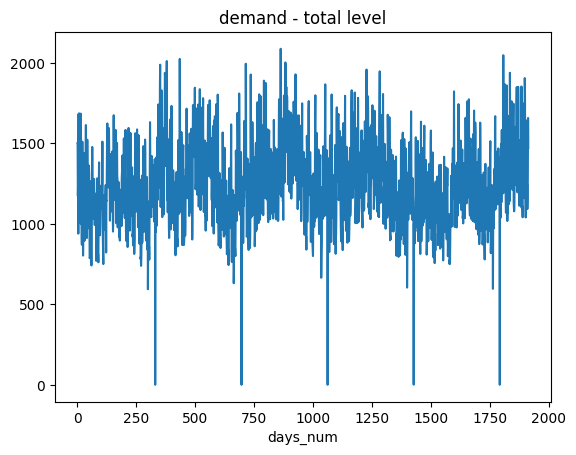

In [39]:
hierarchy_df["total"].plot(title="demand - total level");

In [136]:
ax = hierarchy_df[hierarchy_df.index].plot(title="Trips - state level")

KeyError: "None of [Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n            ...\n            1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913],\n           dtype='int64', name='days_num', length=1913)] are in the [columns]"

In [40]:
from hts.model import AutoArimaModel
from hts import HTSRegressor

In [43]:
model_rt_arima.fit()

InvalidArgumentException: Either nodes and df must be passed, or a pre-built hierarchy tree

In [44]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.8/601.8 KB 3.1 MB/s eta 0:00:00a 0:00:01
  Using cached Cython-0.29.33-py2.py3-none-any.whl (987 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
You should consider upgrading via the '/Users/eveder/.pyenv/versions/3.8/envs/project/bin/python3 -m pip install --upgrade pip' command.


In [51]:
model_rt_arima = hts.HTSRegressor(model='auto_arima', revision_method='BU', n_jobs=0)
model_rt_arima = model_rt_arima.fit(hierarchy_df, hier)
pred_rt_arima = model_rt_arima.predict(steps_ahead=7)

Fitting models:   1%|▏         | 15/1064 [18:31<36:45:47, 126.17s/it]